### Importing libraries

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

#Translation package
from googletrans import Translator

#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

### Make a request to a website and get a response

In [12]:
base_site = "https://www.letudiant.fr/etudes/annuaire-enseignement-superieur/etablissement/etablissement-estiam-82456.html"

response = requests.get(base_site)
response.status_code

200

### Getting a HTML content from a response

In [14]:
html = response.content

In [15]:
soup = BeautifulSoup(html, 'html.parser')

### Save a response to an HTML file

In [89]:
# with open('projet_pedagogique.html', 'wb') as file:
#     file.write(soup.prettify('utf-8'))

### Retrieve parent element

In [18]:
divs = soup.find_all('div', attrs={'class': 'c-box--wire__section'})
#divs

### Extract name and publication date

In [96]:
# [div.find('div', {'class': 'c-avis__user__info__resume__name'}) for div in divs]

In [97]:
# full_name_date = [None if div.find('div', {'class': 'c-avis__user__info__resume__name'}) is None else div.find('div', {'class': 'c-avis__user__info__resume__name'}).string.strip().replace("\n", "").replace("", "") for div in divs]
# full_name_date

### Extract Comments

In [20]:
#[div.find('p', {'class': 'c-avis__user__comment'}) for div in divs]

In [22]:
comments = [None if div.find('p', {'class': 'c-avis__user__comment'}) is None else div.find('p', {'class': 'c-avis__user__comment'}).string.strip() for div in divs]
#comments

In [101]:
# TextBlob("The movie is dirty").sentiment

### Create a Dataframe 

In [107]:
comments_info = pd.DataFrame()

comments_info['Comments'] = comments

#comments_info

In [108]:
pd.set_option('display.max_colwidth', None)
#comments_info

### Cleaning Data 

In [109]:
comments_info = comments_info.dropna()
# comments_info

In [110]:
comments_info = comments_info.replace(r'^\s*$', np.NaN, regex=True)#
# comments_info

In [111]:
comments_info.dropna(subset = ["Comments"], inplace=True)
# comments_info

In [112]:

comments_info['Comments'] = comments_info.Comments.str.replace(r'\n', '')
# comments_info['Comments'] = comments_info.Comments.str.replace(r'.', '')

comments_info = comments_info.replace(r'^\s*$', np.NaN, regex=True)
comments_info.dropna(subset = ["Comments"], inplace=True)

comments_info

,Comments
4,"Une école parfaite en terme d'apprentissage, d'organisation, vie étudiant et d’accompagnement que ce soit au sein de l'école ou à l’extérieur pour la recherche d'alternance ou de contrat d'apprentissage, une équipe administrative toujours disponible pour la satisfaction et pour répondre aux besoins des étudiants, une très bonne qualité du contenu de la formation et des intervenants très compétent techniquement et pédagogique."
6,"Mon fils est ravi d'être dans cette école, les profs très professionnels, domage qu'il n'y a pas assez de publicité pour se fait connaître cet établissement."
8,"Après un BTS en informatique, j'ai intégré l'ESTIAM en 3ème année et je suis très content de mon choix. J'ai choisi l'ESTIAM car le programme est très à la pointe des dernières technologies. De plus le nombre d'heures de cours était clairement indiqué, ce qui n'est pas le cas de toutes les écoles. L'école est à Paris, ce qui est très pratique pour aller à des conférences et pour trouver un stage. Les cours se déroulent dans une ambiance cool et studieuse. Les locaux sont tout neufs et les salles de cours agréables. Je recommande cette école!"
10,.
12,"Je laisse un commentaire, parce que je suis assez étonné des derniers qui ont été publié.Je suis très content d'être à l'ESTIAM. C'est une bonne école, avec en moyenne des bons profs. Il y a parfois des soucis, mais pas plus que dans toutes école. Au moins on se sent écouté et l'équipe a mis en oeuvre pas mal de chose depuis le début d'année pour satisfaire les plus éxigents.Alors je lis des commentaires sur le wifi ou les distributeurs et sa me fait rire: c'est des trucs qui sont réglés depuis longtemps et qui était externe à l'école.D'ailleurs dans les commentaires, il y a quelqu'un qui raconte n'importe quoi (au sujet du diplôme et tout sa…), ça sent la campagne d'attaque d'une école concurrente...Si je devais conseiller l'ESTIAM à mes potes, je le ferai. Je l'ai fait d'ailleurs!Tiens, je rempli les étoiles et je me rends compte que la plupart des gens ont rien mis pour bibliothèques: tout est en ligne! On a accès à plein de supports de cours et toute la bibliothèque ENI depuis le portail des étudiants."
16,"Ce n'est pas une école c'est un arnaque, vraiment zéro organisation, c'est grâce aux élèves que l'école vie toujours je pense"
18,"Une formation inégale due à une grande fourchette de niveaux à l'entrée : si on sait déjà on s'ennuie, si on ne sait pas ça va trop vite. Le dossier à l'entrée est là pour donner l'illusion d'une sélection, mais on se retrouve avec de tous les niveaux dans toutes les formations.Au cours de mes 2 ans là bas, l'administration a rencontré de nombreux conflits pour la gestion des cours, des plannings...L'équipe se rattrape par la bonne volonté et la bonne humeur de certains accompagnant, et d'un sérieux vis à vis des relations professionnelles que la formation apporte."
20,"Une formation inégale due à une grande fourchette de niveaux à l'entrée : si on sait déjà on s'ennuie, si on ne sait pas ça va trop vite. Le dossier à l'entrée est là pour donner l'illusion d'une sélection, mais on se retrouve avec de tous les niveaux dans toutes les formations.Au cours de mes 2 ans là bas, l'administration a rencontré de nombreux conflits pour la gestion des cours, des plannings...L'équipe se rattrape par la bonne volonté et la bonne humeur de certains accompagnant, et d'un sérieux vis à vis des relations professionnelles que la formation apporte."
22,"Après 5ans de travail chez Orange tunisie , j'ai décidé de continuer mes etudes et me suis retrouvée à l’ÉSTIAM. Quelle bonne décision ! Je ne regrette pas ! Les élèves y sont passionnés travailleurs et exigeants, les projets pédagogiques sont une réelle introduction au monde professionnel et il y a une réelle envie de rendre le programme actuel. Certains vous dirons que l'école est loin d'être parfaite et c'est bien le cas mais pour une école aussi jeune l’ÉSTIAM est clairement en avance sur son temps et offre une 

### Translate comments from french to English

In [113]:
translator = Translator()         
df = pd.DataFrame(comments_info)
df['Comments_English'] = df['Comments'].apply(translator.translate,src='fr',dest='en').apply(getattr, args=('text',))
# df

In [111]:
# TextBlob("the movie was bad").sentiment

### Define and create a polarity sentiment for each comments

In [114]:
pol = []
for i in comments_info.Comments_English.values:
    try:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    except:
        pol.append(0)

In [115]:
comments_info['pol'] = pol

In [116]:
comments_info['pol'][comments_info.pol==0] = 0
comments_info['pol'][comments_info.pol > 0]= 1
comments_info['pol'][comments_info.pol < 0]= -1

In [117]:
df_positive = comments_info[comments_info.pol==1]
# df_positive.head(5)

In [118]:
df_positive = comments_info[comments_info.pol==-1]
# df_positive

In [119]:
df_positive = comments_info[comments_info.pol==0]
# df_positive.head(5)

### Display bar chart to evaluate the polarity

 1.0    18
 0.0     3
-1.0     1
Name: pol, dtype: int64

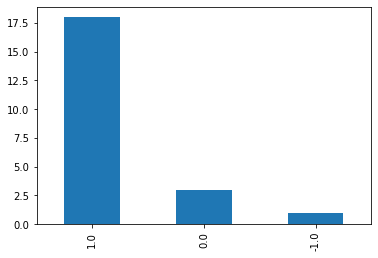

In [120]:
comments_info.pol.value_counts().plot.bar()
comments_info.pol.value_counts()

### Other Code not relevant at all

In [52]:
# comments_info.shape

In [53]:
# comments_info.info()
# comment_infos.describe().transpose()

In [45]:
# comments_info.describe().transpose()

In [44]:
# count = comment_infos.isnull().sum().sort_values(ascending=False)
# percentage = ((comment_infos.isnull().sum()/len(comment_infos)*100)).sort_values(ascending=False)
# missing_data = pd.concat([count, percentage], axis=1, keys=['Count', 'Percentage'])

# print('Count and Percentage of mising values for the columns:')

# missing_data

In [189]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# print('Percentage for default\n')
# print(round(comment_infos.Comments.value_counts(normalize=True)*100,2))
# round(comment_infos.Comments.value_counts(normalize=True)*100,2).plot(kind='bar')
# plt.title('Precentage per comment')
# plt.show()

In [ ]:
# import re
# import string

# def text_clean_1(text):
#     text = text.lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\w*\d\w*', '', text)